In [44]:
import matplotlib.pyplot as plt
from skimage.filters import *
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import rotate
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from skimage.draw import line
import math

In [45]:
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

In [46]:
def get_rotation(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    (wh_x, wh_y) = np.where(binary==True)
    r = {}
    l = {}

    for i in range(len(wh_x)):
        if wh_x[i] in r:
            r[wh_x[i]] = max(r[wh_x[i]], wh_y[i])
        else:
            r[wh_x[i]] = wh_y[i]

        if wh_x[i] in l:
            l[wh_x[i]] = min(l[wh_x[i]], wh_y[i])
        else:
            l[wh_x[i]] = wh_y[i]
    
    for key in set(r.keys()).intersection(l.keys()):
        if r[key] == l[key]:
            del r[key]
            del l[key]
    
    al, bl = curve_fit(f, list(l.keys()), list(l.values()))[0]
    ar, br = curve_fit(f, list(r.keys()), list(r.values()))[0]
    rd = -1*(math.degrees(math.atan(al))+math.degrees(math.atan(ar)))/2
    
    return rd

In [51]:
image_colored = io.imread("Dataset/rec-1.png")
image = rgb2gray(image_colored)

In [52]:
rd = get_rotation(image)

In [53]:
rd

5.7956345104128415

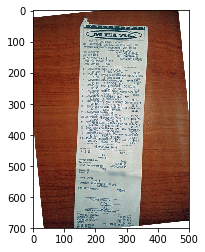

In [54]:
plt.imshow(rotate(image_colored, rd))

In [ ]:
(lx, ly) = line(0,int(al*0+bl),600,int(al*600+bl))
(rx, ry) = line(0,int(ar*0+br),600,int(ar*600+br))
for i in range(len(lx)):
    try:
        image_colored[lx[i]][ly[i]] = [55,155,255,255]
    except:
        pass
    try:
        image_colored[rx[i]][ry[i]] = [255,155,55,255]
    except:
        pass

In [ ]:
plt.imshow(image_colored)